In [1]:
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
class UAV:
    
    def __init__(self):
        
        self.start_loc = np.random.random_integers(low=0, high=GRID_LENGTH-1, size=2)
        self.end_loc = np.random.random_integers(low=0, high=GRID_LENGTH-1, size=2)
        self.curr_loc = self.start_loc
        self.status = 0 # 0 is flying, 1 is done, 2 is crashed
        
    def fly_step(self):
        
        delta = self.end_loc - self.curr_loc
        step = np.array([np.sign(delta[0]), np.sign(delta[1])])
        self.curr_loc += step

        if np.array_equal(self.curr_loc, self.end_loc): self.status = 1

In [9]:
GRID_LENGTH = 100
NUM_DIMS = 2
NUM_UAVS = list(range(10, 100, 10))
MAX_TIMESTEPS = 100
NUM_ITERS = 10

In [12]:
def experiment(num_uavs):
    
    crashes = []
    for _ in range(NUM_ITERS):
        
        GRID = list(itertools.product(range(GRID_LENGTH), range(GRID_LENGTH)))
        WORLD = {(x,y):set([]) for x, y in GRID}
        
        crash = set([])
        
        uavs = {}
        for idx in range(num_uavs):
            uav = UAV()
            WORLD[tuple(uav.curr_loc)].add(idx)
            uavs[idx] = uav

        for timestep in range(MAX_TIMESTEPS):

        #     print("\nTimestep: ", timestep)
            remaining = len([uav for idx, uav in uavs.items() if uav])
            if remaining == 0: break
        #     print("UAVS remaining: ", remaining)

            for idx, uav in uavs.items():
                if not uav: continue
        #         print("Before UAV: ", idx, "; Loc: ", uav.curr_loc, "; WORLD: ", WORLD[tuple(uav.curr_loc)])
                if idx in WORLD[tuple(uav.curr_loc)]: WORLD[tuple(uav.curr_loc)].remove(idx)
                uav.fly_step()

            for idx, uav in uavs.items():
                if not uav: continue
                WORLD[tuple(uav.curr_loc)].add(idx)
        #         print("After UAV: ", idx, "; Loc: ", uav.curr_loc, "; WORLD: ", WORLD[tuple(uav.curr_loc)], "; Status: ", uav.status)

            for loc in GRID:
                if len(WORLD[loc]) > 1:
                    loc_uavs = WORLD[loc]
                    for idx in loc_uavs:
                        if not uavs[idx]: continue # necessary?
                        uavs[idx] = None
                        crash.add(timestep)

            for idx, uav in uavs.items():
                if not uav: continue
                if uav.status == 1: 
                    uavs[idx] = None
        crashes.append(len(crash))
    print(num_uavs, crashes)
    return np.mean(crashes), np.std(crashes)

In [14]:
crashes = []
for num_uavs in NUM_UAVS:
    crashes.append(experiment(num_uavs))

/Users/prasadkawthekar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  """
/Users/prasadkawthekar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  


10 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
20 [1, 1, 2, 1, 1, 1, 1, 0, 0, 0]
30 [4, 1, 5, 4, 2, 3, 1, 3, 1, 3]
40 [4, 3, 8, 4, 4, 4, 4, 4, 2, 4]
50 [2, 7, 8, 5, 5, 7, 10, 6, 4, 7]
60 [7, 9, 7, 9, 11, 7, 10, 7, 9, 8]
70 [15, 13, 12, 10, 10, 14, 13, 12, 13, 11]
80 [15, 15, 14, 17, 11, 12, 19, 9, 17, 13]
90 [20, 20, 18, 12, 15, 16, 15, 19, 13, 16]


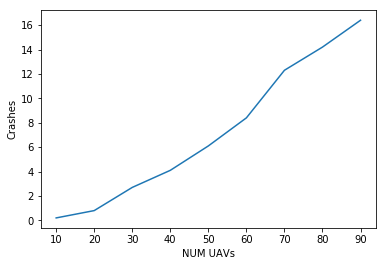

In [15]:
plt.plot(NUM_UAVS, [crash[0] for crash in crashes])
plt.xlabel('NUM UAVs')
plt.ylabel('Crashes')

In [16]:
crashes

[(0.20000000000000001, 0.40000000000000008),
 (0.80000000000000004, 0.60000000000000009),
 (2.7000000000000002, 1.3453624047073709),
 (4.0999999999999996, 1.4456832294800961),
 (6.0999999999999996, 2.118962010041709),
 (8.4000000000000004, 1.3564659966250536),
 (12.300000000000001, 1.5524174696260025),
 (14.199999999999999, 2.8913664589601922),
 (16.399999999999999, 2.6532998322843202)]